# <center> Exercise D5: Foundation of Statistics

First exercise on sampling and descriptive statistics.  

    Author: Tri Juliansyah M Sambas
    Date: 25th October 2019

# Part A
During training

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
data_df = pd.read_excel('../Dataset/data loan.xlsx')

In [3]:
data_df.head(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,OTHERS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others


In [4]:
data_df.tail(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
28290,28291,MINIBUS,Karyawan,Sumatera,60,>120 - 150 hari,Ya,536.339999,87.01,432.00,...,108.00,375.86,Private,Sarjana,Ada,OTHERS,Perempuan,Ya,3.61,Others
28291,28292,MINIBUS,Wiraswasta,Sumatera,60,> 150 hari,Ya,584.880008,92.34,407.30,...,81.46,376.10,Private,Others,Tidak ada,MENIKAH,Laki-laki,Tidak,3.61,Jasa & Perdagangan
28292,28293,OTHERS,Wiraswasta,Jawa,60,> 150 hari,Ya,670.020007,89.59,515.74,...,103.17,462.05,Private,Others,Ada,MENIKAH,Perempuan,Tidak,3.61,Jasa & Perdagangan


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 23 columns):
Kontrak                  28293 non-null int64
Tipe_Kendaraan           28293 non-null object
Pekerjaan                28293 non-null object
Area                     28293 non-null object
Tenor                    28293 non-null int64
Bucket_Collectability    28293 non-null object
NPF                      28293 non-null object
Total_AR                 28293 non-null float64
LTV                      28293 non-null float64
OTR                      28293 non-null float64
Age                      28293 non-null int64
Interest_Rate            28293 non-null float64
Income                   28293 non-null int64
DP                       28293 non-null float64
AF                       28293 non-null float64
Tujuan                   28293 non-null object
Pendidikan               28293 non-null object
Tanggungan               28293 non-null object
Status                   28293 non-null obj

## Exploratory Data Analysis

In [6]:
numerical = list(data_df.dtypes[data_df.dtypes != 'object'].index)
categorical = list(data_df.dtypes[data_df.dtypes == 'object'].index)

In [7]:
data_df.describe()

,Kontrak,Tenor,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Inflasi
count,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000
mean,14147.000000,45.104867,214.777125,81.146981,204.385958,40.680133,13.741759,20.449334,59.117309,163.551610,5.531061
std,8167.629919,13.281078,88.386433,14.986763,79.938138,9.564789,3.517159,115.608090,40.830083,64.204471,1.797010
min,1.000000,12.000000,1.401000,5.110000,1.690000,19.000000,0.000000,1.000000,0.000000,1.390000,3.210000
25%,7074.000000,36.000000,156.321600,77.870000,157.800000,34.000000,11.190000,9.000000,37.670000,122.480000,3.830000
50%,14147.000000,48.000000,201.120000,83.830000,187.700000,40.000000,13.450000,15.000000,47.700000,153.230000,5.310000
75%,21220.000000,60.000000,266.207999,89.360000,231.050000,48.000000,16.210000,20.000000,67.960000,193.310000,7.250000
max,28293.000000,60.000000,1854.341300,111.830000,1508.400000,82.000000,27.400000,10000.000000,721.350000,1312.810000,8.790000


In [8]:
data_df['Tenor'].value_counts()

60    9008
48    8055
36    7752
24    2352
12    1126
Name: Tenor, dtype: int64

In [9]:
data_df['Tipe_Kendaraan'].value_counts()

MINIBUS            14440
LCGC                6078
OTHERS              5657
TRUCK & PICK UP     2118
Name: Tipe_Kendaraan, dtype: int64

### Feature Engineering

In [10]:
mod_data_df = data_df.copy()

In [11]:
mod_data_df.loc[mod_data_df['Tipe_Kendaraan'] != 'MINIBUS','Tipe_Kendaraan'] = 'NON_MINIBUS'

In [12]:
mod_data_df['Tipe_Kendaraan'].value_counts()

MINIBUS        14440
NON_MINIBUS    13853
Name: Tipe_Kendaraan, dtype: int64

In [13]:
mod_data_df.columns

Index(['Kontrak', 'Tipe_Kendaraan', 'Pekerjaan', 'Area', 'Tenor',
       'Bucket_Collectability', 'NPF', 'Total_AR', 'LTV', 'OTR', 'Age',
       'Interest_Rate', 'Income', 'DP', 'AF', 'Tujuan', 'Pendidikan',
       'Tanggungan', 'Status', 'Gender', 'Paket', 'Inflasi', 'Segmen'],
      dtype='object')

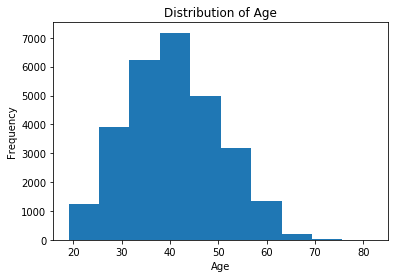

In [14]:
plt.title('Distribution of Age')
_ = mod_data_df['Age'].plot.hist()
plt.xlabel('Age')
plt.show()

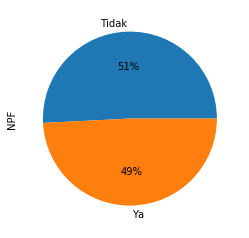

In [15]:
_ = mod_data_df['NPF'].value_counts().plot.pie(autopct = '%1.0f%%')

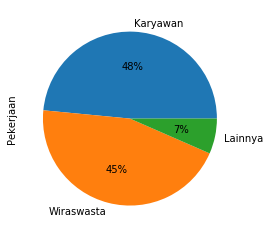

In [16]:
_ = mod_data_df['Pekerjaan'].value_counts().plot.pie(autopct = '%1.0f%%')

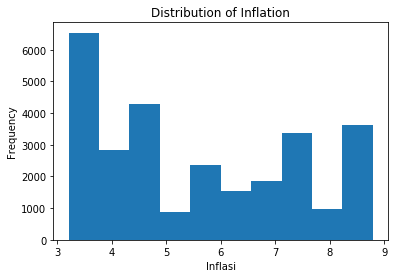

In [17]:
plt.title('Distribution of Inflation')
_ = mod_data_df['Inflasi'].plot.hist()
plt.xlabel('Inflasi')
plt.show()

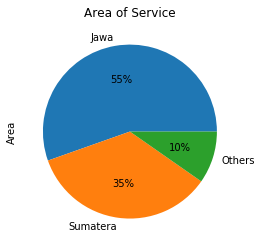

In [18]:
plt.title('Area of Service')
_ = mod_data_df['Area'].value_counts().plot.pie(autopct = '%1.0f%%')

In [19]:
mod_data_df.columns

Index(['Kontrak', 'Tipe_Kendaraan', 'Pekerjaan', 'Area', 'Tenor',
       'Bucket_Collectability', 'NPF', 'Total_AR', 'LTV', 'OTR', 'Age',
       'Interest_Rate', 'Income', 'DP', 'AF', 'Tujuan', 'Pendidikan',
       'Tanggungan', 'Status', 'Gender', 'Paket', 'Inflasi', 'Segmen'],
      dtype='object')

In [20]:
numerical

['Kontrak',
 'Tenor',
 'Total_AR',
 'LTV',
 'OTR',
 'Age',
 'Interest_Rate',
 'Income',
 'DP',
 'AF',
 'Inflasi']

In [21]:
categorical

['Tipe_Kendaraan',
 'Pekerjaan',
 'Area',
 'Bucket_Collectability',
 'NPF',
 'Tujuan',
 'Pendidikan',
 'Tanggungan',
 'Status',
 'Gender',
 'Paket',
 'Segmen']

In [22]:
mod_data_df['Paket'].value_counts()

Tidak    15961
Ya       12332
Name: Paket, dtype: int64

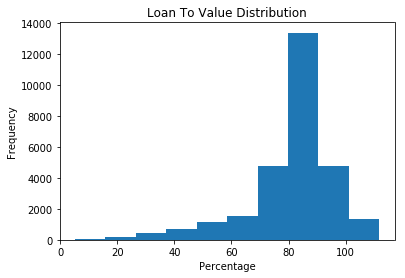

In [23]:
plt.title('Loan To Value Distribution')
mod_data_df['LTV'].plot.hist()
plt.xlabel('Percentage')
plt.show()

In [24]:
mod_data_df.columns

Index(['Kontrak', 'Tipe_Kendaraan', 'Pekerjaan', 'Area', 'Tenor',
       'Bucket_Collectability', 'NPF', 'Total_AR', 'LTV', 'OTR', 'Age',
       'Interest_Rate', 'Income', 'DP', 'AF', 'Tujuan', 'Pendidikan',
       'Tanggungan', 'Status', 'Gender', 'Paket', 'Inflasi', 'Segmen'],
      dtype='object')

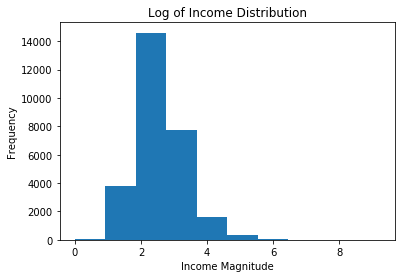

In [25]:
plt.title('Log of Income Distribution')
np.log(mod_data_df['Income']).plot.hist()
plt.xlabel('Income Magnitude')
plt.show()

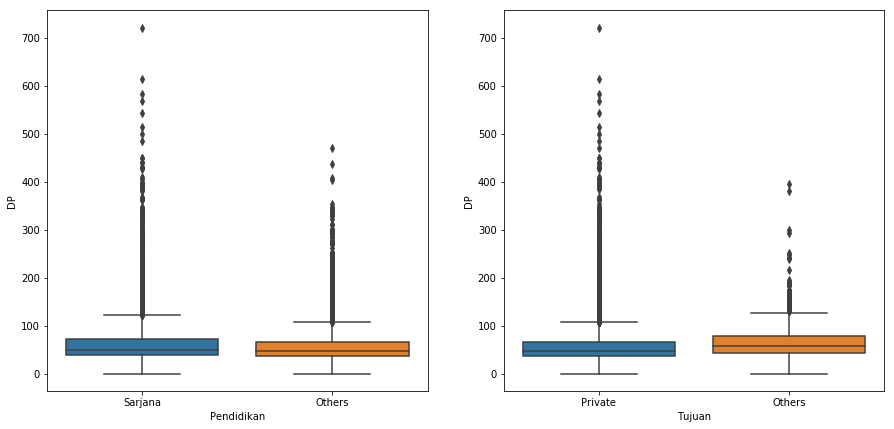

In [26]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.boxplot(x = 'Pendidikan', y = 'DP', data = mod_data_df)

plt.subplot(1,2,2)
sns.boxplot(x = 'Tujuan', y = 'DP', data = mod_data_df)
plt.show()

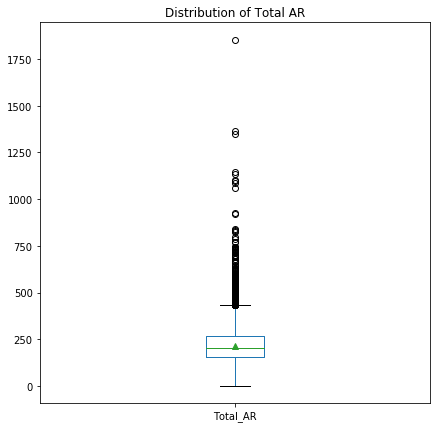

In [27]:
plt.figure(figsize = (7,7))
plt.title('Distribution of Total AR')
mod_data_df['Total_AR'].plot.box(showmeans=True)
plt.show()

In [28]:
mod_data_df['Total_AR'].mean()

214.77712517028976

In [29]:
mod_data_df['Total_AR'].median()

201.12

In [30]:
def count_outlier(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    low_fence = Q1 - 1.5*IQR
    high_fence = Q3 + 1.5*IQR
    counter = 0
    for element in data:
        if element < low_fence or element > high_fence:
            counter = counter + 1
    return counter

In [31]:
print('The number of outliers present in the data are %i entries' % count_outlier(mod_data_df['Total_AR']))

The number of outliers present in the data are 478 entries


# Part B: Data Analysis
Exercise on the last part

## 1. Ambil sampel secara acak dari data loan sebanyak 80% dari banyaknya data.

Sampling randomly 80% of the dataset using built-in pandas function.

In [32]:
rand_data_df = data_df.copy()
rand_data_df = rand_data_df.sample(round(80/100*len(rand_data_df)), random_state = 1234)
rand_data_df.sort_values(by = 'Kontrak', inplace = True)
rand_data_df.reset_index(inplace = True, drop = True)

In [33]:
rand_data_df.head(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,OTHERS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others


## 2. Lakukan analisis statistik menggunakan metode-metode yang telah dipelajari di kelas ini.


### Feature Engineering
- **Binary transformation:** generating value **1 for True** and **0 for False** on each categorical variable which only has two possibilities.
- **Ordinal transformation:** generating an ordered list of values to represent an ordered categorical variable.
- **Nominal tranformation/Dummy variable:** generating dummy variables out of categorical variables in which they are nominal type of data.

#### Binary Transformation

In [34]:
rand_data_df['NPF_num'] = rand_data_df['NPF'].apply(lambda x: 1 if x == 'Ya' else 0)
rand_data_df['Tujuan_Private_num'] = rand_data_df['Tujuan'].apply(lambda x: 1 if x == 'Private' else 0)
rand_data_df['Pendidikan_Sarjana_num'] = rand_data_df['Pendidikan'].apply(lambda x: 1 if x == 'Sarjana' else 0)
rand_data_df['Tanggungan_Ada_num'] = rand_data_df['Tanggungan'].apply(lambda x: 1 if x == 'Ada' else 0)
rand_data_df['Menikah_Ya_num'] = rand_data_df['Status'].apply(lambda x: 1 if x == 'MENIKAH' else 0)
rand_data_df['Gender_Pria_num'] = rand_data_df['Gender'].apply(lambda x: 1 if x == 'Laki-laki' else 0)
rand_data_df['Paket_num'] = rand_data_df['Paket'].apply(lambda x: 1 if x == 'Ya' else 0)
rand_data_df['Segmen_Jasa_num'] = rand_data_df['Segmen'].apply(lambda x: 1 if x == 'Jasa & Perdagangan' else 0)

#### Ordinal Transformation

In [35]:
def convert_to_num(data):
    if data == '0 - 30 hari':
        return 0
    elif data == '>30 - 90 hari':
        return 1
    elif data == '>90 - 120 hari':
        return 2
    elif data == '>120 - 150 hari':
        return 3
    elif data == '> 150 hari':
        return 4

In [36]:
rand_data_df['Bucket_Collectability_num'] = rand_data_df['Bucket_Collectability'].apply(convert_to_num)

#### Nominal Transformation

In [37]:
def create_dummy(data):
    entries = data.unique()
    entries_set = set(entries)
    new_columns = data.copy()
    to_ignore = ['OTHERS','Lainnya','Others']
    to_ignore_set = set(to_ignore)
    for entry in entries:
        column = data.copy()
        column.values[:] = 0
        column = column.rename(entry)
        column = column.astype('int64')
        if entry in to_ignore:
            continue
        else:
            column[data == entry] = 1
            new_columns = pd.concat([new_columns,column], axis = 1)
    new_columns = new_columns[list(entries_set-to_ignore_set)]
    return new_columns

In [38]:
rand_data_df = pd.concat([rand_data_df,create_dummy(rand_data_df['Tipe_Kendaraan'])], axis = 1)
rand_data_df = pd.concat([rand_data_df,create_dummy(rand_data_df['Pekerjaan'])], axis = 1)
rand_data_df = pd.concat([rand_data_df,create_dummy(rand_data_df['Area'])], axis = 1)

### Exploratory Data Analysis
getting some insight relating to the variables and observations.

In [39]:
rand_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22634 entries, 0 to 22633
Data columns (total 39 columns):
Kontrak                      22634 non-null int64
Tipe_Kendaraan               22634 non-null object
Pekerjaan                    22634 non-null object
Area                         22634 non-null object
Tenor                        22634 non-null int64
Bucket_Collectability        22634 non-null object
NPF                          22634 non-null object
Total_AR                     22634 non-null float64
LTV                          22634 non-null float64
OTR                          22634 non-null float64
Age                          22634 non-null int64
Interest_Rate                22634 non-null float64
Income                       22634 non-null int64
DP                           22634 non-null float64
AF                           22634 non-null float64
Tujuan                       22634 non-null object
Pendidikan                   22634 non-null object
Tanggungan            

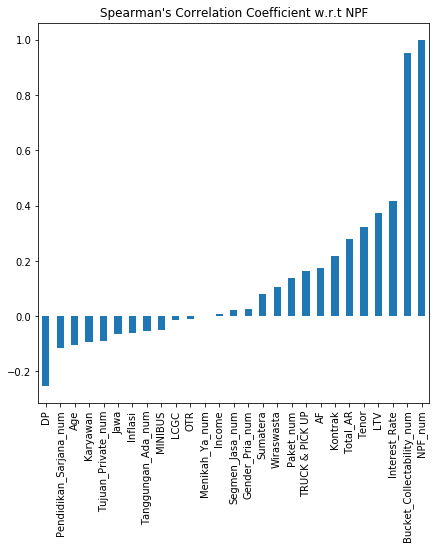

In [40]:
plt.figure(figsize = (7,7))
plt.title('Spearman\'s Correlation Coefficient w.r.t NPF')
rand_data_df.corr()['NPF_num'].sort_values().plot.bar()
plt.show()

At the moment, we would like to assume that our target variable is **NPF_num**. Because of that, the variable **Bucket_Collectability_num** cannot be used since it highly correlates with our target and also from the business side, this information could only be obtain after we approve the customers. Therefore, we remove **Bucket_Collectability_num** from the equations.

### Data Preparation
Manual step of **stratified sampling** and then **defining predictor** columns and **target** column. I also include **train-test data splitting** in this part to generate the credit scores.

In [41]:
np.random.seed(1234)
rand_data_df['filter'] = 'test'
rand_data_df.loc[rand_data_df['NPF_num'] == 1,'random'] = np.random.rand(len(rand_data_df[rand_data_df['NPF_num'] == 1]))
rand_data_df.loc[rand_data_df['NPF_num'] == 0,'random'] = np.random.rand(len(rand_data_df[rand_data_df['NPF_num'] == 0]))
rand_data_df.loc[rand_data_df['random'] < 0.7,'filter'] = 'train'

In [42]:
rand_data_df['filter'].value_counts()

train    15813
test      6821
Name: filter, dtype: int64

In [43]:
predictors = rand_data_df.copy()
col_predictors = list(set(rand_data_df.columns) - set(categorical) - set(['Kontrak','random','NPF_num','Bucket_Collectability_num']))
col_predictors_no_train = list(set(rand_data_df.columns) - set(categorical) - set(['Kontrak','random','NPF_num','Bucket_Collectability_num','filter']))
predictors = predictors[col_predictors]

In [44]:
target = rand_data_df.copy()
target = target[['NPF_num','filter']]

In [45]:
X_train = predictors.loc[predictors['filter'] == 'train', col_predictors_no_train]
y_train = target.loc[target['filter'] == 'train', 'NPF_num']
X_test = predictors.loc[predictors['filter'] == 'test', col_predictors_no_train]
y_test = target.loc[target['filter'] == 'test', 'NPF_num']

### Modeling
* Generating score: using Logistic Regression and then multiplied by 1000
* Creating Linear Regression model: to approximate the credit score

##### Generating Score

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X = X_train, y = y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
pred_coeff = pd.concat([pd.Series(X_test.columns),pd.Series(model.coef_[0])], axis = 1).rename(columns = {0:'Predictors',1:'Coefficients'})
pred_coeff.sort_values(by = 'Coefficients')

,Predictors,Coefficients
22,Karyawan,-0.402117
3,LCGC,-0.204641
17,Pendidikan_Sarjana_num,-0.114688
16,Segmen_Jasa_num,-0.112402
1,Wiraswasta,-0.111712
10,Tanggungan_Ada_num,-0.065463
13,Paket_num,-0.049072
8,Menikah_Ya_num,-0.038872
2,AF,-0.023795
7,Age,-0.014534


**Generating score** by using prediction from logistic regression.

In [50]:
rand_data_df['credit_score'] = np.round(model.predict_proba(rand_data_df[col_predictors_no_train])[:,0]*1000)

##### Creating Linear Regression Model

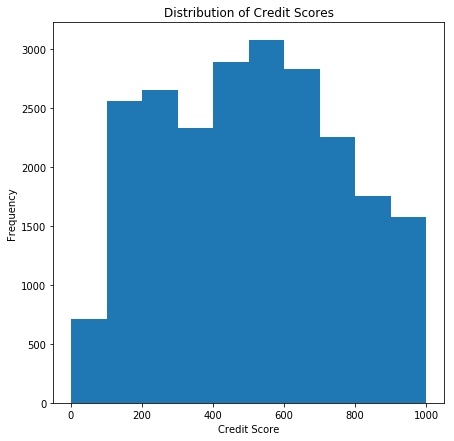

In [51]:
plt.figure(figsize = (7,7))
plt.title('Distribution of Credit Scores')
rand_data_df['credit_score'].plot.hist()
plt.xlabel('Credit Score')
plt.show()

In [52]:
target = rand_data_df.copy()
target = target[['credit_score','filter']]
y_train_lin = target.loc[target['filter'] == 'train', 'credit_score']
y_test_lin = target.loc[target['filter'] == 'test', 'credit_score']

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train, y_train_lin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
pred_coeff = pd.concat([pd.Series(X_test.columns),pd.Series(model.coef_)], axis = 1).rename(columns = {0:'Predictors',1:'Coefficients'})
pred_coeff.sort_values(by = 'Coefficients')

,Predictors,Coefficients
5,TRUCK & PICK UP,-196.968476
20,Sumatera,-126.872741
23,Jawa,-85.685269
15,Tujuan_Private_num,-29.426485
12,Gender_Pria_num,-25.372315
11,Inflasi,-19.637138
18,Interest_Rate,-18.084601
6,MINIBUS,-15.375338
19,LTV,-8.312832
13,Paket_num,-5.421458


The table above shows that if their jobs are **Karyawan**, they are more likely to get higher score than people who work as **Wiraswasta or others**. Moreover, from this dataset, we could also find that purchasing a **LCGC car** are more likely to get better credit score whilst if they buy **TRUCK & PICK UP**, then they tend to default. Nevertheless, surprisingly, the linear model also shows unexpected result regarding to **AF (Amount Financed)**. The coefficient is **positive** which means **the higher they ask for loan amount**, it is **more likely that they got approved**. Further analysis is needed on this case and also any other **'a bit absurd'** variables such as **Gender** (do men have higher default rate more than women or is it just because more men than women in the dataset?) and etc.

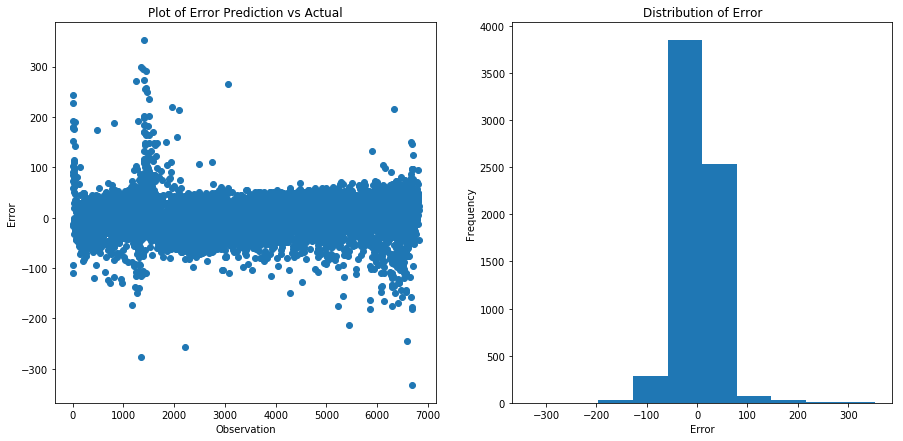

In [59]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Plot of Error Prediction vs Actual')
plt.scatter(np.arange(len(X_test)),model.predict(X_test)-y_test_lin)
plt.ylabel('Error')
plt.xlabel('Observation')

plt.subplot(1,2,2)
plt.title('Distribution of Error')
plt.hist(model.predict(X_test)-y_test_lin)
plt.ylabel('Frequency')
plt.xlabel('Error')
plt.show()

In [58]:
RMSE = np.sqrt(sum((model.predict(X_test)-y_test_lin)**2/len(X_test)))
print('Your RMSE is %.2f' %RMSE)

Your RMSE is 39.87


The figures above tell us about **the performance of the linear regression model**. In general, the linear regression model **performs quite well**. On the left figure, one can see that most of the errors are gathered around zero which means _the difference between predicted scores versus actual scores is not that much_ (Of course, it is **exactly what we expect** because generated scores come from Logistic Regression which is **still family of linear model**). The result is also supported by the histogram on the right hand side. The errors are concetrated in 0 and have thin bars which mean the deviation is low. As a closure, I even compute the **RMSE (Root Mean-Squared Error)** which is **39.87** (quite low compared to the range of score from 0 until 1000).